<a href="https://colab.research.google.com/github/aruanalucena/Cientista-de-Dados-Developer-Aruana/blob/master/Projeto_final_Awari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/mbdq8P5.png)


#  <font color='Blue'> **Projeto AWARI - Curso AWARI de Ciêntista de Dados**<font>
*  Ministrado por Sara Malvar e Mentoria de Bruno Lucian  

![Imgur](https://i.imgur.com/3jqbgTZ.jpg)
# O objetivo:
* Aplicar todo o conhecimento dado no curso de Cientista de dados , desenvolver as habilidades de entender as etapas e todos os processos para dominar a profissão e alcançar os objetivos
### Linguagem de programação Python para manipular dados
> * Pandas
> * Bibliotecas
### Machine Learning
> * diversos algoritimos com suas especificidades 
### Storyteling
>* Apresentar os resultados
>* Desenvolver a escrita para produzir bons documentos, claros objetivos.
### SQL 
>* Tabelas, chaves, modelos de dados, syntaxe

# ETAPAS DE UM PROJETO DE DATA SCIENCE .

> Bloco com recuo

---

---

---









![Imgur](https://i.imgur.com/DBHhXSW.png)

![Imgur](https://i.imgur.com/NNeD1c7.png)

# Guia para o notebook:
<font color='#15a270'> >> </font> Textos precedidos de sinais na cor <font color='#15a270'> Verde </font> são comentários gerais feitos por mim. <br>
<font color='Red'> >> </font> Textos precedidos de sinais na cor <font color='Red'> Vermelha </font> são questionamentos que tentarei responder. <br>
<font color='Blue'> >> </font> Textos precedidos de sinais na cor <font color='Blue'> Azul </font> são respostas e hipóteses levantadas por mim para responder aos questionamentos anteriores.

# <font color = ' arrow'>**1 - Questão de Negócio**</font>
### Definir questões a serem respondidas
#### Modelo de machine Learning capaz de prever
* Valor de venda. 
* Valor de Locação.
* Sistema de recomendação.
* Classificação de risco prever inadimplência.
      * O Inquilino vai pagar em dia?
* Documentação toda digital.


>* Quais plataformas para fazer webscraping?
>* Quais plataforma tem APIs?
>* Quais informações coletar?
>* Tipo de informação?
>* Região dos dados?
>*Segurança transacional de documentos?
>* validação de assinaturas?


# <font color = ' arrow'>**2- Análise exploratória/Limpeza/Exploraçaõ dos Dados**</font>
![Imgur](https://i.imgur.com/8rS4iTd.jpg)

In [17]:

# Importando Bibliotecas Essenciais, maratona_dudu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [21]:
# Carregar os Dados
data = pd.read_csv('/content/risco.csv')
#data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] += 2

# Se conectando com os dados - Nesse caso, a Fonte de Dados é um Arquivo
#dataset = pd.read_csv('dados.csv')

In [22]:
# Informações do Dataset - Tipo das Variáveis, Quantidade de linhas (registros) e colunas (variáveis/features)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       150 non-null    int64  
 1   anot_cadastrais  150 non-null    float64
 2   indice_inad      150 non-null    float64
 3   class_renda      150 non-null    float64
 4   saldo_contas     150 non-null    float64
 5   Risco            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [23]:
#Verifica as dimensões do dataset (antes de vírgula são linhas    ,     depois da vírgula são colunas)
data.shape

(150, 6)

In [25]:
# Cria uma função para imprimir na tela o resultado da função SHAPE
print(f"Data tem {data.shape[0]} linhas e {data.shape[1]} colunas.")

Data tem 150 linhas e 6 colunas.


In [27]:
#Estatísticas descritivas das variáveis numéricas
data.describe()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [28]:
# Tabela de Frequência da Variável "risco" - Nossa Classe ou Label ou Target
data['Risco'].value_counts()

Risco_Baixo    50
Risco_Medio    50
Risco_Alto     50
Name: Risco, dtype: int64

In [29]:
# Forma adicional de criar a Tab. de Frequência
data.Risco.value_counts()

Risco_Baixo    50
Risco_Medio    50
Risco_Alto     50
Name: Risco, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


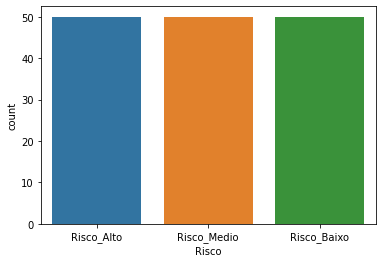

In [30]:
# Cria um gráfico de barras da variável Target
sns.countplot(data['Risco'])

In [31]:
# Check for missing values
data.isna().sum()

id_cliente         0
anot_cadastrais    0
indice_inad        0
class_renda        0
saldo_contas       0
Risco              0
dtype: int64

In [32]:
#Eliminar a coluna de identificação, pois ela não é variável explicativa, é somente a identificação do cliente7
dataset = data.drop(columns='id_cliente')

In [33]:
#Printa o dataset na tela
data

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Risco_Baixo
146,146,6.3,2.5,5.0,1.9,Risco_Baixo
147,147,6.5,3.0,5.2,2.0,Risco_Baixo
148,148,6.2,3.4,5.4,2.3,Risco_Baixo


In [ ]:
# Cria um gráfico tipo box and whisker plots (o famoso boxplot)
# from matplotlib import pyplot
# dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
# pyplot.show()

In [ ]:
#cria um gráfico conhecido como histohrama
# dataset.hist()
# plt.show()

In [ ]:
# Criação do Gráfico de dispersão (scatter) conhecido como pairplot
# sns.pairplot(dataset, hue='Risco', kind="reg") # kind=reg é a reta de regressão

In [ ]:
# Criação do Gráfico de dispersão sem agregar pelo TARGET
# sns.pairplot(dataset,kind="reg")

In [ ]:
#X = data.drop('default payment next month', axis=1)
# y = data['default payment next month'].copy()


# <font color = ' arrow'>**Webscraping**</font>

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import keysimport pandas as pd

In [ ]:
driver = webdriver.chrome('/home/aruana/ChromeDriver/crromedriver')

In [ ]:
driver.get('https://www.vivareal.com.br/')

In [ ]:
items =  len(driver.find_elements_by_class_name('property-card__title js-cardLink js-card-title'))


In [ ]:
total =[]
for item in range(items):
      items = driver.find_elements_byClass_name('property-card__title js-cardLink js-card-title')
for item in items:
      t_content = item.find_element_by_class_name('content').text
      t_header = item.find_element_by_class_name('header').text
      t_address = item.find_element_by_class_name('address').text
      t_map-link = item.find_element_by_class_name('map-link').text
      t_details = item.find_element_by_class_name('details').text
      t_amenities = item.find_element_by_class_name('amenities').text
      new = ((t_content,  t_header,t_address,  t_map-link, t_details, t_amenities ))
      total.append(new)

In [ ]:
total

In [ ]:
df = pd.DataFrame(total, columns=['Content','Header','Address', 'Map-link','Details','Amenities'])

In [ ]:
df.head()


# <font color = ' arrow'>**3 - Interpretar e Modelar os Dados**</font>

In [ ]:
#3 Separando as Variáveis de Entrada e Saída do Modelo
#X = dataset.iloc[:,:-1].values  #variáveis independentes
# y = dataset.iloc[:,-1].values  #Target/labe/class/vairável dependente

In [ ]:
#Print das variáveis X e Y
# print("\nVariáveis de Entrada da avaliação:\n\n", X[:3])
# print("\nRisco - Variável a ser Predita :\n\n", y[:3])

In [ ]:
# X

In [ ]:
# Y

In [ ]:
#Divide o dataset em Train and Test 
# X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state = 7) 

In [ ]:
#print("Dados de Treino :\n----------------\n")
#print("X = \n", X_train[:2])
#print("y = \n", y_train[:2])

# print("\n\nDados de Teste :\n----------------\n")
#print("X = \n",X_test[:2])
# print("y = \n", y_test[:2])

In [ ]:
# print(f"Shape dos dados de treino é {X_train.shape}")
# print(f"Shape dos dados de teste é {X_test.shape}")

In [ ]:
#Redimensionando os dados - PADRONIZAÇÂO - Feature scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test) 

# print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

# print("\nX_train :\n", X_train[:5])
# print("-------------------------")
# print("\nX_test :\n", X_test[:5])

In [ ]:
#Print das variáveis X e Y
# print("\nVariáveis de Entrada da avaliação:\n\n", X[:3])
# print("\nRisco - Variável a ser Predita :\n\n", y[:3])

In [ ]:
# Separação entre treino e teste
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_score, KFold, train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


# <font color = ' arrow'>**4- Algorítimos de Machine Learning**</font>

### 1° Versão da Máquina Preditiva: Criando um **baseline**

Aqui nós vamos criar a primeira versão da Máquina Preditiva. Depois, vamos buscar formas de melhorar a assertividade do modelo. 

In [ ]:
# Importando a Biblioteca KNN
# from sklearn.neighbors import KNeighborsClassifier
# Maquina_Preditiva = KNeighborsClassifier(n_neighbors=30) #[1,10,30,50]

In [ ]:
#Treinando a Máquina preditiva com os dados de treino
# Maquina_Preditiva = Maquina_Preditiva.fit(X_train,y_train)

In [ ]:
#Fazendo novas Previsões com os dados de teste
# y_pred = Maquina_Preditiva.predict(X_test)


# print("\n---------------------------\n")
# print("Valores Reais com dados de teste :\n",y_test)

# print("\n---------------------------\n")
# print("Valores Preditos com a Máquina Preditiva com dados de Teste :\n",y_pred)

In [ ]:
#Função que mostra os hyperparâmetros utilizados na construção da Máquina Preditiva 
Maquina_Preditiva.get_params

### <font color = ' blue '>Regressão Logistica

In [ ]:
#parece que o random_state do LogisticRegression não está funcionando, 
#então este modelo pode dar resultados diferentes cada vez que for rodado
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
kf = KFold(n_splits=5, random_state=0, shuffle=True)

categs = [1,2,3,4,5,6,7,8,9,10]
ohe = OneHotEncoder(categorical_features=categs, handle_unknown='ignore')
model = make_pipeline(ohe, LogisticRegression(C=0.5, random_state=1, class_weight='balanced'))
cross_val_score(model, X_train, y_train, n_jobs=-1, cv=kf, scoring='roc_auc').mean()


### <font color = ' blue '>Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits=5, random_state=0, shuffle=True)

model = RandomForestClassifier(n_jobs=-1, n_estimators=500, max_features=6, min_samples_leaf=20, random_state=0, class_weight='balanced')
cross_val_score(model, X_train, y_train, n_jobs=1, cv=kf, scoring='roc_auc').mean()

### <font color = ' blue '>Gradient Boosted Trees

In [ ]:
import xgboost as xgb

kf = KFold(n_splits=5, random_state=0, shuffle=True)

model = xgb.XGBClassifier(learning_rate=0.009, max_depth=6, min_child_weight=3,
                     subsample=0.15, colsample_bylevel=0.85, n_estimators=500)
cross_val_score(model, X_train, y_train, n_jobs=1, cv=kf, scoring='roc_auc').mean()


# <font color = ' arrow'>**5 - Avaliação do Algoritimo**</font>

In [ ]:
# Calculando a Acurácia
# from sklearn import metrics
# print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)

In [ ]:
# Comparando Real e Predito com dados de Teste
# print("\nReal vs Predito \n------------------------------\n")
# error_df = pd.DataFrame({"Real" : y_test,
  #                       "Predito" : y_pred})

# error_df.head(5)

In [ ]:
#Usando a confusion matrix  e o classification report para avaliar a acurácia e demais indicadores
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn import metrics

#print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)
# cm = confusion_matrix(y_test,y_pred)
# cr = classification_report(y_test, y_pred)
# print(cm)
# print(cr)

### 2° Versão da Máquina Preditiva: Máquina Definitiva 

In [ ]:
# Importando a Biblioteca do SVM
#from sklearn.svm import SVC
# classifier = SVC(kernel='linear',             # ['linear', 'rbf']
  #               gamma= 1e-5  ,               # [1e-1, 1e-2, 1e-3, 1e-5]
   #              C=10,                        # [10.0, 100.0, 1000.0, 10000.0]
    #             random_state=7)

In [ ]:
#Treinando a Máquina com o SVC
# classifier.fit(X_train,y_train)

In [ ]:
#Fazendo novas previsões com os dados de teste
# y_pred = classifier.predict(X_test)

# print("\n---------------------------\n")
# print("Predicted Values for Test Set :\n",y_pred)
# print("\n---------------------------\n")
# print("Actual Values for Test Set :\n",y_test

In [ ]:
#Imprimindo os hyperparâmetros utilizados na criação da Maquina Preditiva Definitiva
classifier

In [ ]:
# Calculando a Acurácia da Máquina Preditiva
# from sklearn import metrics
# print("Prediction Accuracy = ", metrics.accuracy_score(y_test, y_pred))

# Comparando valores Reais com Preditos pela Máquina
# print("\nActual vs Predicted  \n------------------------------\n")
# error_df = pd.DataFrame({"Actual" : y_test,
  #                       "Predicted" : y_pred})

#error_df.head(5)

In [ ]:

#Usando a confusion matrix e o classification report para avaliar a Máquina
# from sklearn.metrics import confusion_matrix, classification_report

# cm = confusion_matrix(y_test,y_pred)
# cr = classification_report(y_test, y_pred)

In [ ]:
# Imprimindo a Confusion Matrix e o Classification Report
# print(cm)
# print(cr)

### <font color = ' blue '>**Modelo Final no Teste**</font>

In [ ]:
from sklearn.metrics import roc_auc_score

model = xgb.XGBClassifier(learning_rate=0.009, max_depth=6, min_child_weight=3,
                     subsample=0.15, colsample_bylevel=0.85, n_estimators=500)
model.fit(X_train, y_train)
p = model.predict_proba(X_test)
roc_auc_score(y_test, p[:, 1])


# <font color = ' arrow'>**6 - Publicação do modelo em Produção**</font>

### <font color='Blue'>Deploy - Implementando a Maquina Preditiva na WEB</font>
#### **Passo a Passo** Implementação do Sistema de Classificação de Risco do Cliente:

**1°** Realizar o download da ferramenta "Visual Studio Code" no link abaixo:

https://code.visualstudio.com/

**2°** Instalar a ferramenta: Clicar em "next" e "finish" (simples assim...)

**3°** Criar um diretório "app" no seu Drive "C"

Ex: **C:\app**

**4°** Fazer o Download da pasta "maratona" disponibilizada na página da maratona e via Canal no Telegram.

**5°** Salvar essa pasta dentro do diretório app. 

Ex: **C:\app\maratona** 



**Obs:** dentro da pasta maratona temos 3 arquivos:

1° risco.csv                           - Nossa fonte de dados

2° app_risco.py                        - Nosso Aplicativo web

3° Sistema_Classificação_Risco.ipynb   - Nosso Script de Criação da Máquina Preditiva

**6°** Abrir o VS Code e clicar no menu "File", depois "Open Folder" e vai navegar até o diretório **"C:\app\maratona"**

**7°** Vai no menu "terminal", depois "New Terminal". Perceba que vai abrir, lá embaixo, um terminal de comando, tipo o "CMD" (tela preta) do windows.

**8°** executar os seguinte comandos:

a) pip install plotly     +  tecla enter

b) pip install streamlit  +  tecla enter

**9°** Executar o comando de abertura (no terminal do VS Code), do nosso LINDO sistema:

   **streamlit run app_risco.py**

obs: Nosso sistema vai abrir na WEB. Ver no seu navegador web.

# <font color = ' arrow'>**7 - Considerações finais**</font>

# <font color = ' arrow'>**8 - Fonte e Bibliografias**</font>

# <font color = ' arrow'>**Agradecimentos**</font>